# Breast Cancer Wisconsin (Diagnostic) Dataset

## Creator

**Dr. William H. Wolberg (Physician)**
- University of Wisconsin Hospitals
- Madison, Wisconsin, USA

**Location:**
- [UCI data repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
- [Kaggle data repository](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Attribute Information

1. Sample code number: ID number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

**Class Labels:**
- Malignant (4): Cancerous
- Benign (2): Not Cancerous (Healthy)

## Background

Our bodies are composed of cells, and usually, these cells behave in a certain way. However, occasionally, a cell may behave abnormally, dividing uncontrollably and invading surrounding tissues. This abnormal cell growth, known as cancer, occurs when a specific gene is mutated, leading to the production of abnormal proteins that drive the cell to behave differently.

Dr. William H. Wolberg observed such instances and compiled this dataset to study and analyze breast cancer cases. The dataset includes various features describing cell characteristics, providing valuable information for the diagnosis of breast cancer.erving and put together this dataset.

In [33]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import numpy as np
import pandas as pd

from io import StringIO

from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
data = pd.read_csv("breastCancer.csv").drop("id", axis=1)
print(f"Shape: {data.shape}")
data.head()

Shape: (699, 10)


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
display_string = StringIO()
data.info(buf=display_string)
print(display_string.getvalue())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB



In [4]:
data.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
clump_thickness,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [5]:
data["bare_nucleoli"] = data["bare_nucleoli"].replace({"?":np.nan})

for idx, value in enumerate(data["bare_nucleoli"]):
    if pd.isnull(value):
        data.loc[idx, "bare_nucleoli"] = value
    else:
        data.loc[idx, "bare_nucleoli"] = np.int64(value)

data["bare_nucleoli"] = data["bare_nucleoli"].fillna(data["bare_nucleoli"].mean())

In [6]:
data.isnull().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

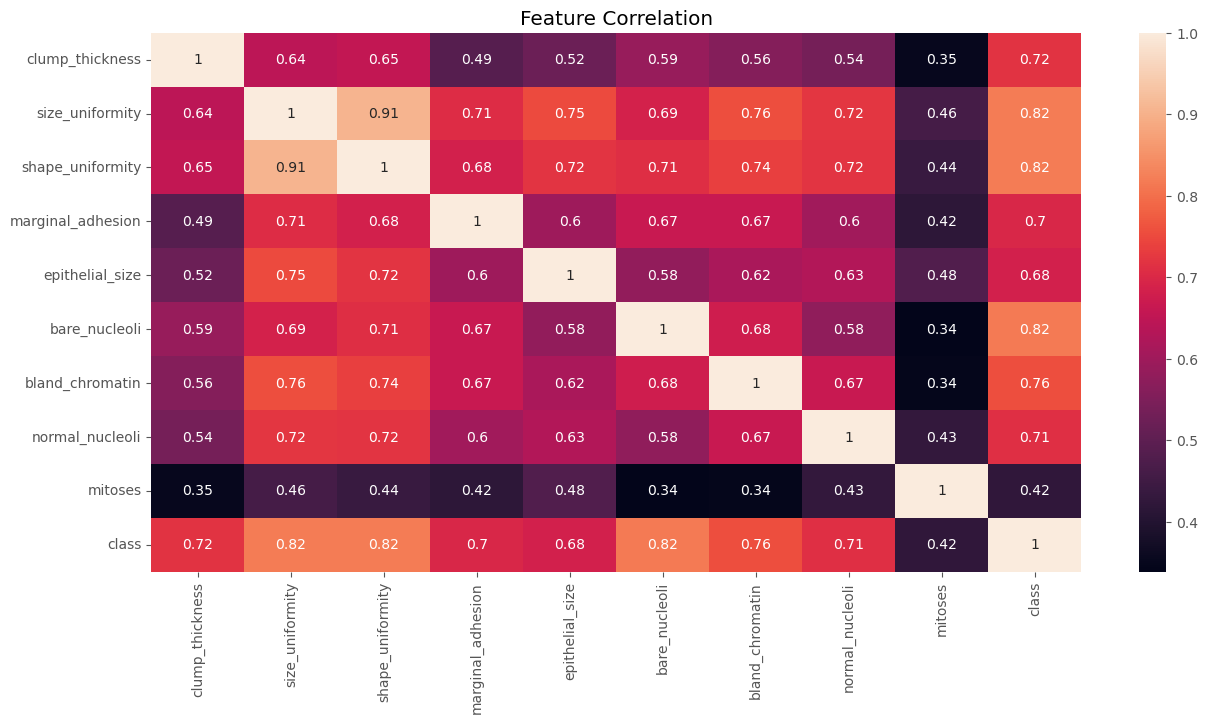

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

In [14]:
data.nunique()

clump_thickness      10
size_uniformity      10
shape_uniformity     10
marginal_adhesion    10
epithelial_size      10
bare_nucleoli        11
bland_chromatin      10
normal_nucleoli      10
mitoses               9
class                 2
dtype: int64

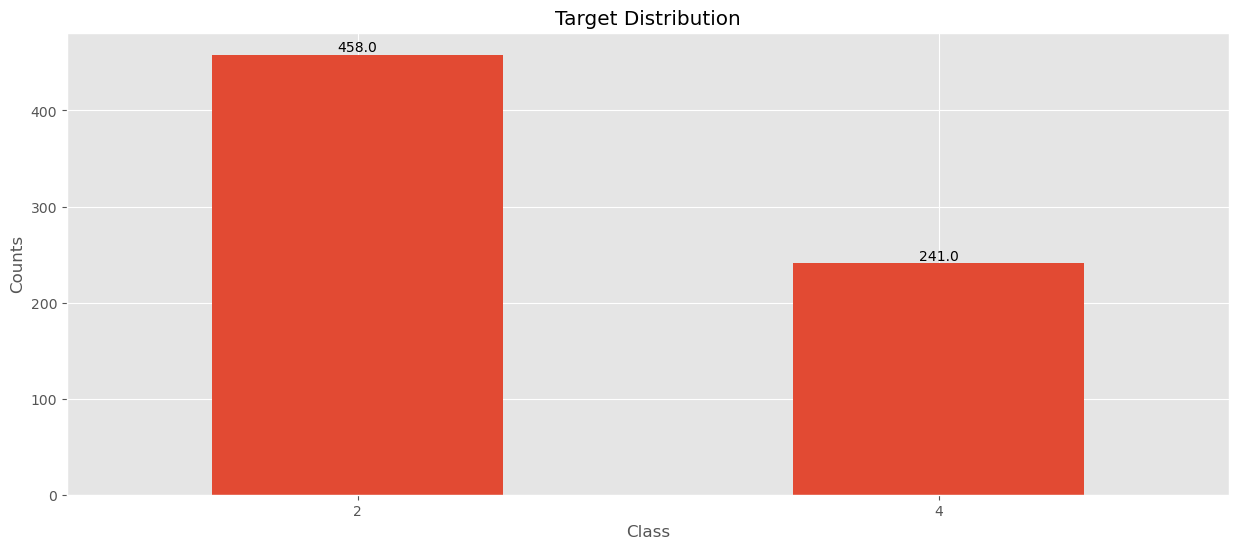

In [30]:
target_dist = data["class"].value_counts().plot(kind="bar", figsize=(15, 6))

for p in target_dist.patches:
    h = p.get_height()
    target_dist.text(p.get_x()+(p.get_width()/2), h, f"{h:.1f}", ha="center", va="bottom")

target_dist.set_xticklabels(target_dist.get_xticklabels(), rotation=360)
target_dist.set_xlabel("Class")
target_dist.set_ylabel("Counts")
target_dist.set_title("Target Distribution")

plt.show()

In [32]:
data["class"] = data["class"].replace({2:0, 4:1})

In [35]:
X = data.drop("class", axis=1)
y = data["class"]

In [37]:
scaled_X = X.apply(zscore)

In [38]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.1, stratify=y, shuffle=True, random_state=1)

### SVM (Support Vector Machine)

In [40]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(xtrain, ytrain)

svc_pred = svc.predict(xtest)

### KNN (K-Nearest Neighbour)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(xtrain, ytrain)

knn_pred = knn.predict(xtest)

### Model Evaluation

In [45]:
from sklearn import metrics

### Classsification report for SVC

In [47]:
print(metrics.classification_report(ytest, svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.88      0.96      0.92        24

    accuracy                           0.94        70
   macro avg       0.93      0.95      0.94        70
weighted avg       0.95      0.94      0.94        70



### Confusion Matrix for SVC

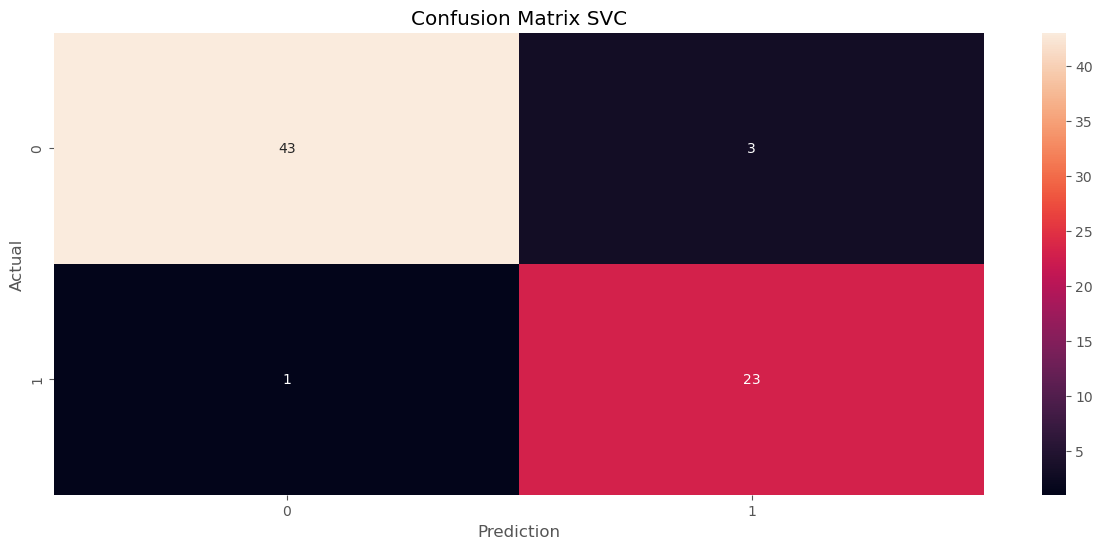

In [50]:
plt.figure(figsize=(15, 6))
sns.heatmap(metrics.confusion_matrix(ytest, svc_pred), annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVC")
plt.show()

In [55]:
def Plot_ROC_Curve(ytrue, ypred):
    fpr, tpr, threshold = metrics.roc_curve(ytrue, ypred)
    auc_score = metrics.auc(fpr, tpr)

    plt.figure(figsize=(15, 7))
    plt.plot(fpr, tpr, c="g", label=f"AUC SCORE: {auc_score}")
    plt.plot([0, 1], [0, 1], ls="--")
    plt.xlabel("False positive rate")
    plt.ylabel("True Positive rate")
    plt.title("ROC CURVE")

    plt.legend(loc="lower right")
    plt.show()

### ROC CURVE for SVC

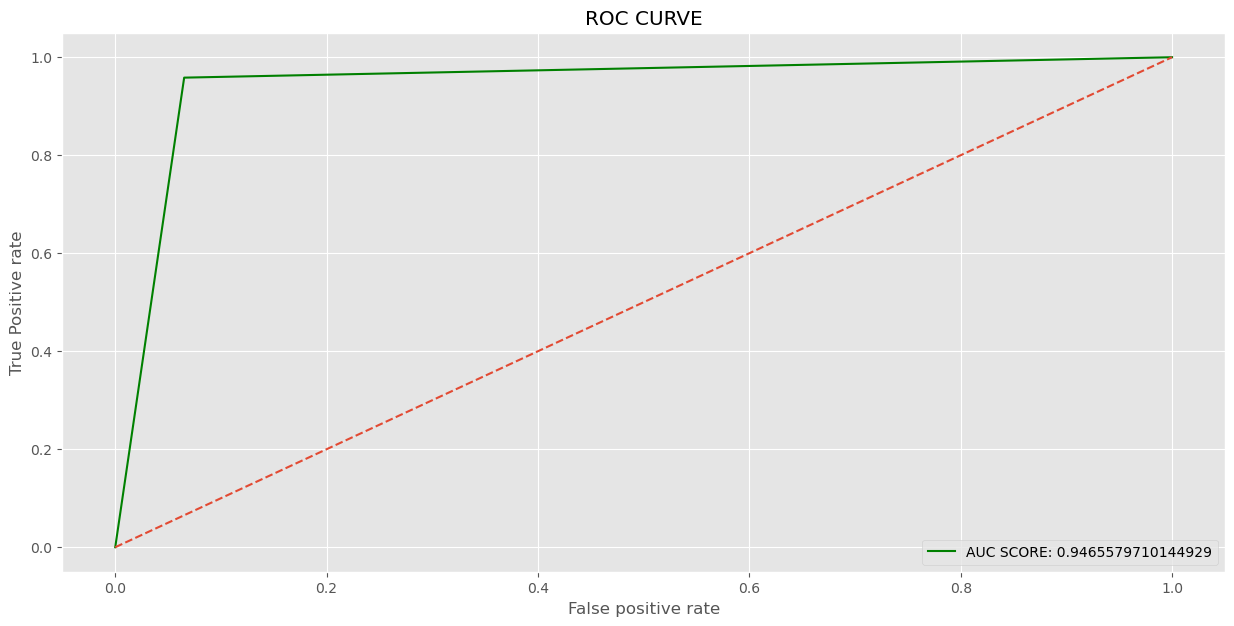

In [56]:
Plot_ROC_Curve(ytest, svc_pred)

### Classsification report for KNN

In [57]:
print(metrics.classification_report(ytest, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.85      0.92      0.88        24

    accuracy                           0.91        70
   macro avg       0.90      0.91      0.91        70
weighted avg       0.92      0.91      0.92        70



### Confusion Matrix for KNN

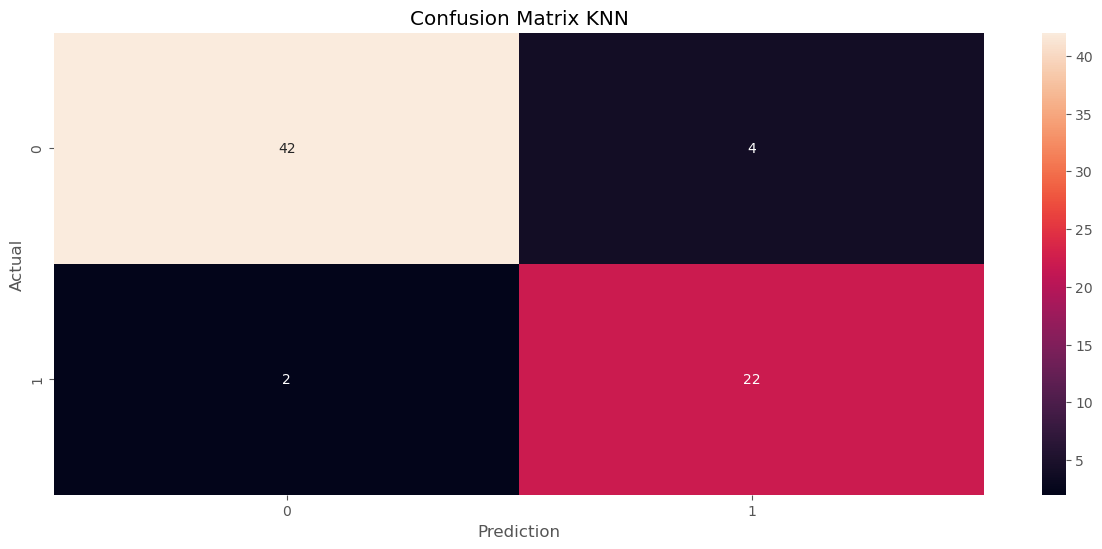

In [58]:
plt.figure(figsize=(15, 6))
sns.heatmap(metrics.confusion_matrix(ytest, knn_pred), annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN")
plt.show()

### ROC CURVE for KNN

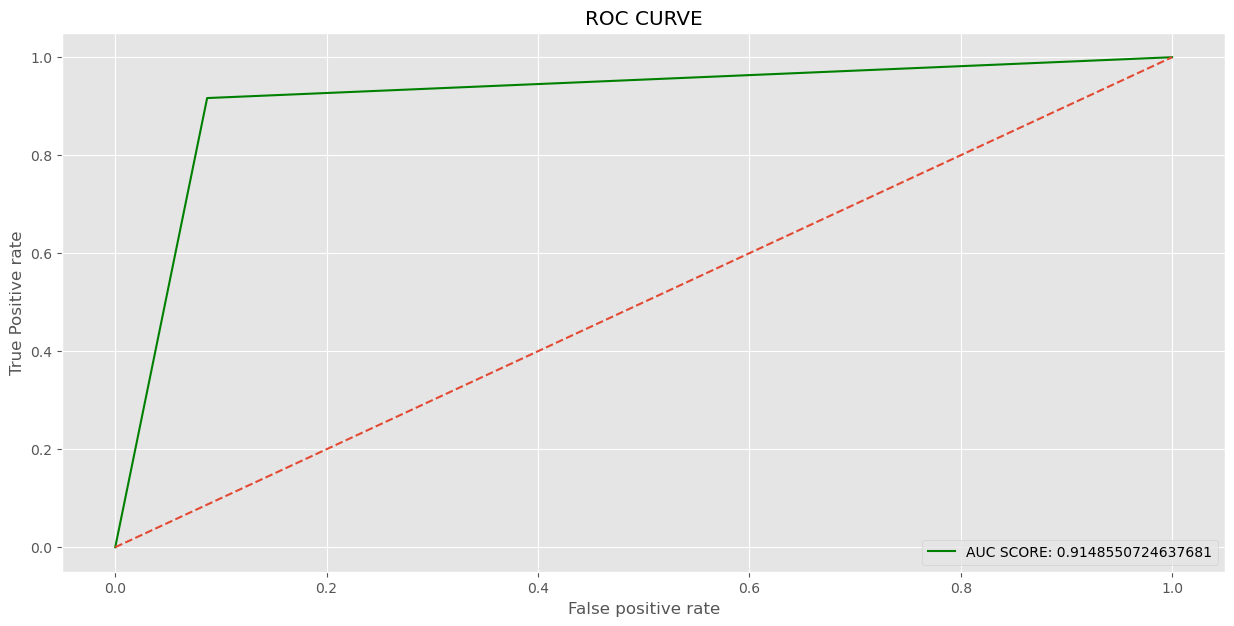

In [59]:
Plot_ROC_Curve(ytest, knn_pred)